In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [2]:
import sys
print(sys.executable)

c:\Users\rajoj\AppData\Local\Programs\Python\Python311\python.exe


In [3]:
!"c:\Users\rajoj\AppData\Local\Programs\Python\Python311\python.exe" -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------------- ------ 6.8/8.1 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 35.9 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 44.0 MB/s  0:00:00
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- ---------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!"c:\Users\rajoj\AppData\Local\Programs\Python\Python311\python.exe" -m pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
    --------------------------------------- 7.6/331.8 MB 42.7 MB/s eta 0:00:08
   -- ------------------------------------- 19.7/331.8 MB 49.7 MB/s eta 0:00:07
   --- ------------------------------------ 31.7/331.8 MB 53.0 MB/s eta 0:00:06
   ----- ---------------------------------- 41.9/331.8 MB 51.3 MB/s eta 0:00:06
   ------ --------------------------------- 54.0/331.8 MB 52.9 MB/s eta 0:00:06
   ------- -------------------------------- 65.3/331.8 MB 52.7 MB/s eta 0:00:06
   --------- ------------------------------ 76.0/331.8 MB 52.1 MB/s eta 0:00:05
   ---------- ----------------------------- 87.0/331.8 MB 52.9 MB/s eta 0:00:05
   ----------- ---------------------------- 97.8/331.8 MB 52.5 MB/s eta 0:00:05
   ------------ -------------------------- 106.7/331.8 MB 51.6 MB/s eta 0:00:05
   ------------- ------------------------- 116.4/331.8 MB 50.9 MB/s eta 0:00:05
   -------------- ------------------------ 125.8/3


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Reshape images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test  = x_test / 255.0

print("After reshaping:", x_train.shape)

After reshaping: (60000, 784)


In [4]:
# Create MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Display model summary
model.summary()

c:\Users\rajoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9231 - loss: 0.2640 - val_accuracy: 0.9665 - val_loss: 0.1129
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9659 - loss: 0.1112 - val_accuracy: 0.9727 - val_loss: 0.0968
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0763 - val_accuracy: 0.9768 - val_loss: 0.0769
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9820 - loss: 0.0579 - val_accuracy: 0.9805 - val_loss: 0.0734
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9808 - val_loss: 0.0799
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9785 - val_loss: 0.0858
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9793 - val_loss: 0.0797
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0261 - 

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9753 - loss: 0.1030
Test Loss: 0.10303326696157455
Test Accuracy: 0.9753000140190125


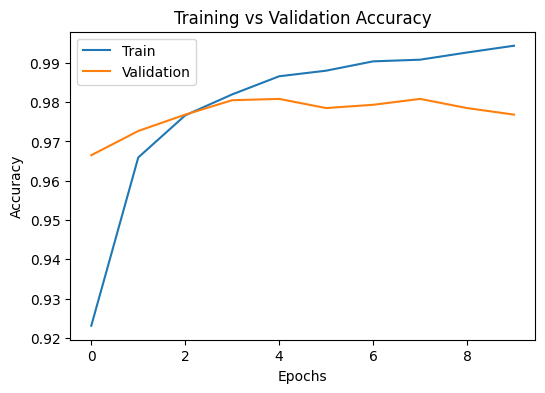

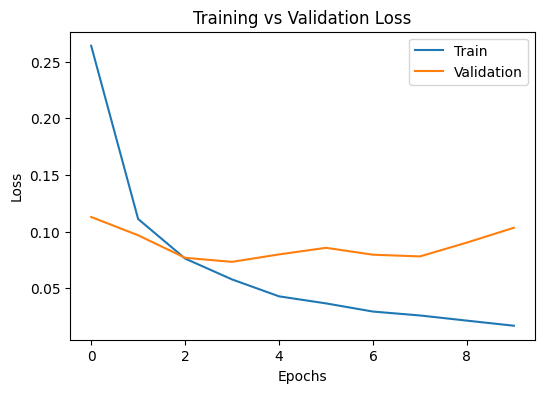

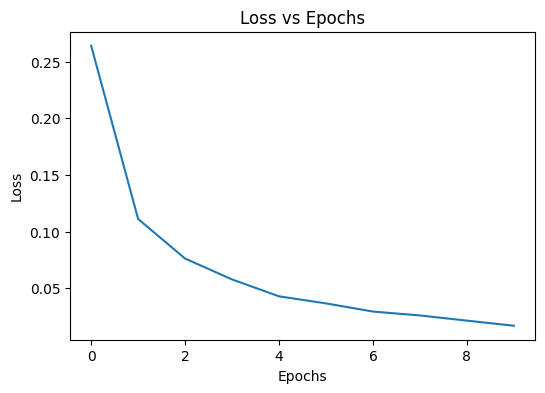

In [8]:
# Accuracy Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


# Loss Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


# Loss vs Epochs (Only Training Loss)
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()